In [108]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import matplotlib.cm as cm
import seaborn
seaborn.set()
%matplotlib inline

In [181]:
### Loading dataframe
df_paper = pd.read_json('./paper_df.json')
df_author = pd.read_json('./author_df.json')
df_inst = pd.read_json('./inst_df.json')
df_country = pd.read_json('./country_df.json')
df_paper = df_paper.drop([0]) # has nan
# All data are available at https://github.com/pajotarthur/ICLR_data

## Average score of the papers, for each type of decision

In [110]:
groupby_decision = df_paper.groupby('decision')
groupby_decision.aggregate(np.average).review

decision
Accept (Oral)               7.304348
Accept (Poster)             6.497877
Invite to Workshop Track    5.362963
Reject                      4.644313
Name: review, dtype: float64

## Histogram of the score 

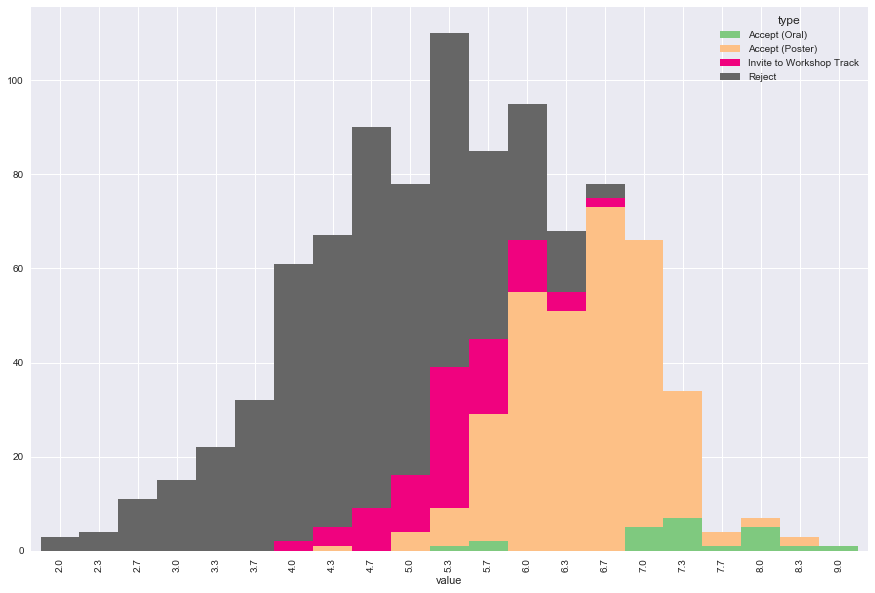

In [111]:
ag.plot(kind = 'bar', colormap = cm.Accent, width = 1,figsize=(15,10),stacked=True)
plt.show()

## Histogram of the score, not stacked. The overlap is quite important

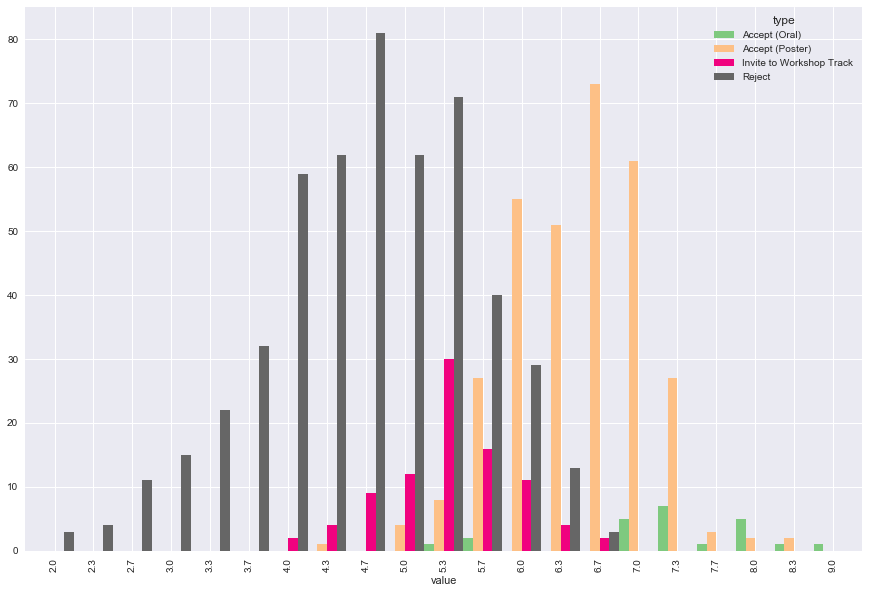

In [184]:
df = pd.DataFrame({'value': df_paper.review.round(1), 'type': df_paper.decision})
df['dummy'] = 1
ag = df.groupby(['value','type']).sum().unstack()
ag.columns = ag.columns.droplevel()

ag.plot(kind = 'bar', colormap = cm.Accent, width = 1,figsize=(15,10))
plt.show()

## Top author for number of accepted paper

In [114]:
df_author.sort_values(['nb_poster','nb_oral','nb_workshop'],ascending=False).head(25)

,avg_note,avg_oral,avg_poster,avg_reject,avg_workshop,id,institution,institution_country,nb_oral,nb_paper,nb_poster,nb_reject,nb_workshop
Sergey Levine,6.000000,0.000000,6.333333,0.000000,5.222222,svlevine@eecs.berkeley.edu,eecs.berkeley.edu,edu,0,10,7,0,3
Yoshua Bengio,5.481481,0.000000,6.190476,5.000000,5.166667,bengioy@iro.umontreal.ca,iro.umontreal.ca,ca,0,18,7,9,2
Richard Socher,6.166667,0.000000,6.722222,5.444444,5.000000,richard@socher.org,socher.org,org,0,10,6,3,1
Caiming Xiong,6.190476,0.000000,6.666667,5.000000,0.000000,cxiong@salesforce.com,salesforce.com,com,0,7,5,2,0
Pieter Abbeel,6.166667,7.500000,6.333333,5.750000,5.333333,pabbeel@cs.berkeley.edu,cs.berkeley.edu,edu,2,12,4,4,2
Dawn Song,5.909091,7.000000,6.583333,5.416667,5.000000,dawnsong@gmail.com,gmail.com,com,1,11,4,4,2
Ian Goodfellow,6.333333,0.000000,6.333333,0.000000,0.000000,goodfellow@google.com,google.com,com,0,4,4,0,0
Kyunghyun Cho,5.777778,0.000000,6.416667,4.500000,0.000000,kyunghyun.cho@nyu.edu,nyu.edu,edu,0,6,4,2,0
Zachary C. Lipton,6.266667,0.000000,6.416667,5.666667,0.000000,zlipton@cmu.edu,cmu.edu,edu,0,5,4,1,0
Max Welling,6.533333,8.000000,6.777778,4.333333,0.000000,m.welling@uva.nl,uva.nl,nl,1,5,3,1,0


## Top author for number of submitted paper

In [115]:
df_author.sort_values(['nb_paper'],ascending=False).head(10)

,avg_note,avg_oral,avg_poster,avg_reject,avg_workshop,id,institution,institution_country,nb_oral,nb_paper,nb_poster,nb_reject,nb_workshop
Yoshua Bengio,5.481481,0.000000,6.190476,5.000000,5.166667,bengioy@iro.umontreal.ca,iro.umontreal.ca,ca,0,18,7,9,2
Pieter Abbeel,6.166667,7.500000,6.333333,5.750000,5.333333,pabbeel@cs.berkeley.edu,cs.berkeley.edu,edu,2,12,4,4,2
Dawn Song,5.909091,7.000000,6.583333,5.416667,5.000000,dawnsong@gmail.com,gmail.com,com,1,11,4,4,2
Sergey Levine,6.000000,0.000000,6.333333,0.000000,5.222222,svlevine@eecs.berkeley.edu,eecs.berkeley.edu,edu,0,10,7,0,3
Richard Socher,6.166667,0.000000,6.722222,5.444444,5.000000,richard@socher.org,socher.org,org,0,10,6,3,1
Quoc V. Le,5.148148,0.000000,6.166667,4.444444,5.166667,adai@google.com,google.com,com,0,9,2,3,4
Ruslan Salakhutdinov,5.666667,7.333333,7.000000,4.250000,0.000000,rsalakhu@cs.cmu.edu,cs.cmu.edu,edu,1,8,3,4,0
Caiming Xiong,6.190476,0.000000,6.666667,5.000000,0.000000,cxiong@salesforce.com,salesforce.com,com,0,7,5,2,0
Kyunghyun Cho,5.777778,0.000000,6.416667,4.500000,0.000000,kyunghyun.cho@nyu.edu,nyu.edu,edu,0,6,4,2,0
Lukasz Kaiser,5.944444,0.000000,7.000000,4.888889,0.000000,lukaszkaiser@google.com,google.com,com,0,6,3,3,0


## Top author for  average note. We choose (arbitrarly) to keep only the authors that submitted more than tree papers.

In [116]:
df_author[df_author.nb_paper > 3].sort_values(['avg_note'],ascending=False).head(10)

,avg_note,avg_oral,avg_poster,avg_reject,avg_workshop,id,institution,institution_country,nb_oral,nb_paper,nb_poster,nb_reject,nb_workshop
Igor Mordatch,7.000000,7.500000,6.333333,6.666667,0.000000,igor.mordatch@gmail.com,gmail.com,com,2,4,1,1,0
Amnon Shashua,6.916667,8.000000,6.833333,0.000000,6.000000,shashua@cs.huji.ac.il,cs.huji.ac.il,il,1,4,2,0,1
Max Welling,6.533333,8.000000,6.777778,4.333333,0.000000,m.welling@uva.nl,uva.nl,nl,1,5,3,1,0
Trevor Darrell,6.500000,7.666667,6.666667,6.333333,5.333333,trevor@eecs.berkeley.edu,eecs.berkeley.edu,edu,1,4,1,1,1
Jason D. Lee,6.500000,0.000000,7.500000,5.666667,5.333333,jasondlee88@gmail.com,gmail.com,com,0,4,2,1,1
Bo Li,6.466667,7.000000,6.833333,5.833333,0.000000,lxbosky@gmail.com,gmail.com,com,1,5,2,2,0
Warren He,6.333333,0.000000,6.833333,5.833333,0.000000,_w@eecs.berkeley.edu,eecs.berkeley.edu,edu,0,4,2,2,0
Ian Goodfellow,6.333333,0.000000,6.333333,0.000000,0.000000,goodfellow@google.com,google.com,com,0,4,4,0,0
Adam Trischler,6.266667,0.000000,6.555556,5.666667,6.000000,adam.trischler@microsoft.com,microsoft.com,com,0,5,3,1,1
Zachary C. Lipton,6.266667,0.000000,6.416667,5.666667,0.000000,zlipton@cmu.edu,cmu.edu,edu,0,5,4,1,0


## Top institution for number of accepted paper.

The institution have written 1 paper if all the authors are from the institution. Otherwise, if among 3 authors, only 1 is from the institution, they have written 1/3 of a paper. The institution have been scrapped from the author's email adress. There is probably more work to do, the code is available at  https://github.com/pajotarthur/ICLR_data/blob/master/add_paper_origin.ipynb. Email ending with gmail.com have been removed.

In [117]:
df_inst.sort_values(['nb_poster','nb_oral','nb_workshop'],ascending=False).head(10)

,acceptance_rate,avg_nb_author,avg_note,avg_oral,avg_poster,avg_reject,avg_workshop,nb_oral,nb_paper,nb_poster,nb_reject,nb_workshop
google.com,0.555341,4.998542,5.782389,7.400000,6.394221,4.898694,5.018868,3.333333,83.024206,42.773449,28.084091,8.833333
Berkeley,0.455809,4.336206,5.804083,7.326087,6.349743,5.191086,5.180204,2.555556,28.596429,10.478968,9.303571,6.258333
Stanford,0.367346,3.291708,5.648448,9.000000,6.919946,4.711551,5.535826,1.000000,28.252814,9.378571,16.090909,1.783333
CMU,0.284611,3.593539,5.348831,7.454545,6.593513,4.742637,5.442982,0.916667,32.280159,8.270635,20.559524,2.533333
Facebook,0.555811,4.004603,5.822401,5.333333,6.656096,4.647059,5.450000,0.166667,14.483333,7.883333,5.100000,1.333333
Microsoft,0.389166,4.412585,5.740885,7.714286,6.757230,4.874873,5.775910,1.166667,21.755952,7.300000,11.305952,1.983333
Oxford University,0.601182,4.063424,5.727582,0.000000,6.285352,4.840000,5.666667,0.000000,8.859524,5.326190,3.333333,0.200000
IBM,0.304785,3.617225,5.619298,0.000000,6.803244,5.029511,6.400000,0.000000,17.416667,5.308333,11.483333,0.625000
Toronto Univ.,0.533566,3.870968,6.194420,0.000000,6.666667,5.818182,5.539683,0.000000,9.558333,5.100000,1.833333,2.625000
ETH,0.435093,3.766049,5.593913,0.000000,6.666667,4.767677,0.000000,0.000000,11.683333,5.083333,6.600000,0.000000


## Top institution for number of submitted paper.


In [118]:
df_inst.sort_values(['nb_paper'],ascending=False).head(10)

,acceptance_rate,avg_nb_author,avg_note,avg_oral,avg_poster,avg_reject,avg_workshop,nb_oral,nb_paper,nb_poster,nb_reject,nb_workshop
google.com,0.555341,4.998542,5.782389,7.400000,6.394221,4.898694,5.018868,3.333333,83.024206,42.773449,28.084091,8.833333
CMU,0.284611,3.593539,5.348831,7.454545,6.593513,4.742637,5.442982,0.916667,32.280159,8.270635,20.559524,2.533333
Berkeley,0.455809,4.336206,5.804083,7.326087,6.349743,5.191086,5.180204,2.555556,28.596429,10.478968,9.303571,6.258333
Stanford,0.367346,3.291708,5.648448,9.000000,6.919946,4.711551,5.535826,1.000000,28.252814,9.378571,16.090909,1.783333
Microsoft,0.389166,4.412585,5.740885,7.714286,6.757230,4.874873,5.775910,1.166667,21.755952,7.300000,11.305952,1.983333
MIT,0.262715,3.682219,5.624772,7.333333,6.607670,5.191318,5.392157,0.500000,19.825000,4.708333,10.366667,4.250000
IBM,0.304785,3.617225,5.619298,0.000000,6.803244,5.029511,6.400000,0.000000,17.416667,5.308333,11.483333,0.625000
Facebook,0.555811,4.004603,5.822401,5.333333,6.656096,4.647059,5.450000,0.166667,14.483333,7.883333,5.100000,1.333333
ETH,0.435093,3.766049,5.593913,0.000000,6.666667,4.767677,0.000000,0.000000,11.683333,5.083333,6.600000,0.000000
Washington Univ.,0.465472,4.287053,5.880742,7.190476,6.787716,5.039764,5.000000,0.875000,11.429762,4.445238,5.109524,1.000000


## Top institution for  average note. We choose (arbitrarly) to keep only the institution that submitted more than tree papers.

In [188]:
df_inst[df_inst.nb_paper > 3].sort_values(['acceptance_rate'],ascending=False).head(10)

,acceptance_rate,avg_nb_author,avg_note,avg_oral,avg_poster,avg_reject,avg_workshop,nb_oral,nb_paper,nb_poster,nb_reject,nb_workshop
NVIDIA,0.823799,5.739130,5.760488,5.666667,6.280702,4.380952,0.000000,1.000000,3.310606,1.727273,0.583333,0.00
Intel,0.750000,6.750000,6.250000,0.000000,6.777778,4.666667,0.000000,0.000000,4.000000,3.000000,1.000000,0.00
cs.huji.ac.il,0.744681,3.063830,6.851064,8.000000,6.888889,0.000000,6.000000,0.666667,3.916667,2.250000,0.000000,1.00
uva.nl,0.741294,3.582090,6.199005,8.000000,6.820896,4.076923,0.000000,0.250000,3.350000,2.233333,0.866667,0.00
salesforce.com,0.730290,3.485477,6.258645,0.000000,6.704545,5.066667,5.000000,0.000000,4.016667,2.933333,0.833333,0.25
Cambridge,0.691223,3.785266,5.889498,0.000000,6.190476,5.215736,0.000000,0.000000,6.076190,4.200000,1.876190,0.00
seas.upenn.edu,0.678930,3.652174,5.948718,0.000000,6.436782,4.916667,0.000000,0.000000,3.559524,2.416667,1.142857,0.00
ttic.edu,0.630631,2.972973,6.534535,0.000000,7.095238,5.333333,5.809524,0.000000,3.700000,2.333333,0.666667,0.70
Oxford University,0.601182,4.063424,5.727582,0.000000,6.285352,4.840000,5.666667,0.000000,8.859524,5.326190,3.333333,0.20
Princeton,0.562044,4.029197,5.693431,0.000000,6.363636,4.500000,5.333333,0.000000,5.708333,3.208333,1.500000,1.00


## Decision bar plot, for each institution

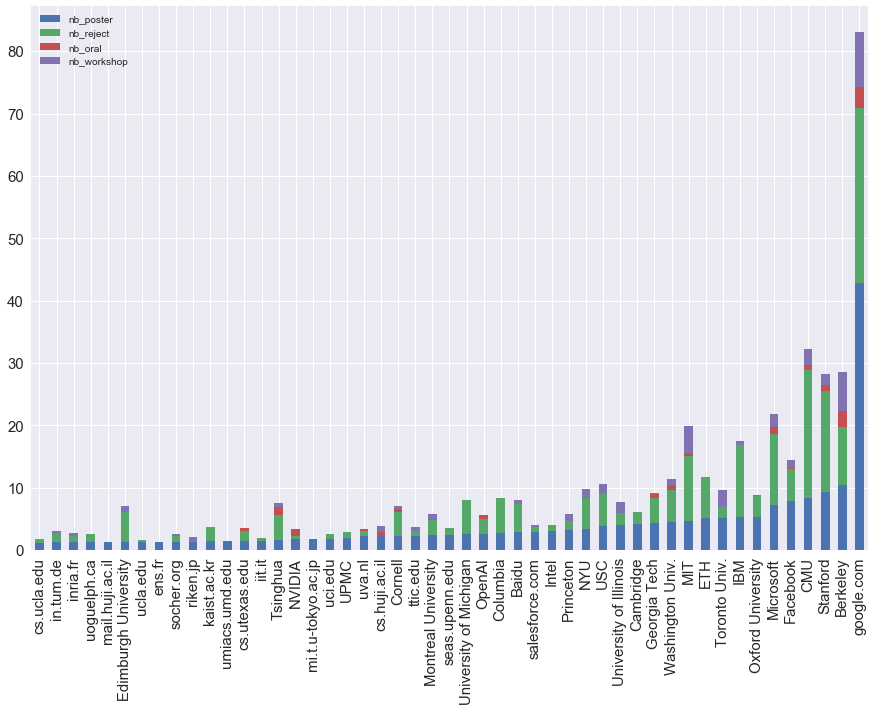

In [163]:
df_inst[df_inst.nb_poster > 1][['nb_poster','nb_reject','nb_oral','nb_workshop']].sort_values(by='nb_poster').plot.bar(figsize=(15,10),legend=True,fontsize=15,stacked=True)


##  Bar plot of the number of accepted paper by institution

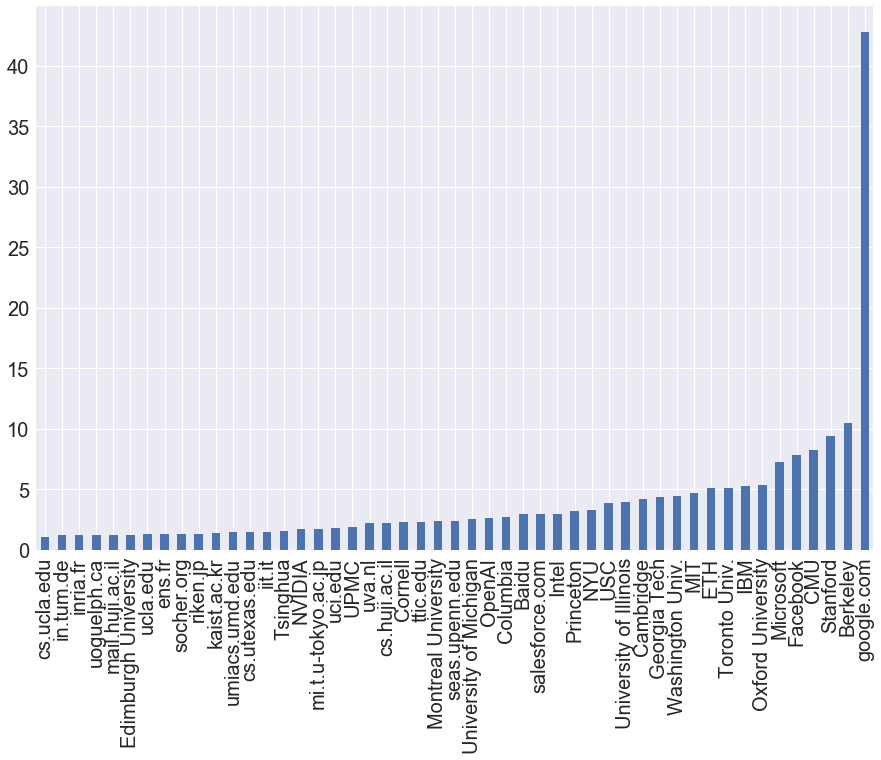

In [174]:
df_inst[df_inst.nb_poster > 1].nb_poster.sort_values().plot.bar(figsize=(15,10),legend=False,fontsize=20)

## Top country for number of accepted paper.


In [175]:
df_country.sort_values(['nb_poster','nb_oral','nb_workshop'],ascending=False).head(10)

,acceptance_rate,avg_note,avg_oral,avg_poster,avg_reject,avg_workshop,nb_oral,nb_paper,nb_poster,nb_reject,nb_workshop
com,0.407407,5.512671,7.145833,6.485320,4.724359,5.310606,16,513,193,260,44
edu,0.392377,5.532885,7.238095,6.501035,4.752252,5.401361,14,446,161,222,49
uk,0.390625,5.328125,0.000000,6.280000,4.648649,6.000000,0,64,25,37,2
ca,0.354167,5.236111,8.000000,6.604167,4.240000,5.277778,1,48,16,25,6
fr,0.428571,5.654762,0.000000,6.750000,4.904762,4.333333,0,28,12,14,2
de,0.289474,5.368421,8.000000,6.500000,4.782609,5.250000,1,38,10,23,4
ch,0.321429,5.309524,0.000000,6.370370,4.705882,5.666667,0,28,9,17,2
org,0.346154,5.525641,0.000000,6.629630,4.888889,5.333333,0,26,9,15,2
cn,0.200000,5.180000,6.555556,6.523810,4.644444,5.433333,3,50,7,30,10
jp,0.428571,5.714286,7.166667,6.571429,4.814815,5.444444,2,21,7,9,3


## Top country for number of submitted paper.


In [176]:
df_country.sort_values(['nb_paper'],ascending=False).head(10)

,acceptance_rate,avg_note,avg_oral,avg_poster,avg_reject,avg_workshop,nb_oral,nb_paper,nb_poster,nb_reject,nb_workshop
com,0.407407,5.512671,7.145833,6.485320,4.724359,5.310606,16,513,193,260,44
edu,0.392377,5.532885,7.238095,6.501035,4.752252,5.401361,14,446,161,222,49
uk,0.390625,5.328125,0.000000,6.280000,4.648649,6.000000,0,64,25,37,2
cn,0.200000,5.180000,6.555556,6.523810,4.644444,5.433333,3,50,7,30,10
ca,0.354167,5.236111,8.000000,6.604167,4.240000,5.277778,1,48,16,25,6
de,0.289474,5.368421,8.000000,6.500000,4.782609,5.250000,1,38,10,23,4
fr,0.428571,5.654762,0.000000,6.750000,4.904762,4.333333,0,28,12,14,2
ch,0.321429,5.309524,0.000000,6.370370,4.705882,5.666667,0,28,9,17,2
org,0.346154,5.525641,0.000000,6.629630,4.888889,5.333333,0,26,9,15,2
jp,0.428571,5.714286,7.166667,6.571429,4.814815,5.444444,2,21,7,9,3


## Top country by acceptance rate.


In [177]:
df_country[df_country.nb_paper > 5].sort_values(['acceptance_rate'],ascending=False).head(10)

,acceptance_rate,avg_note,avg_oral,avg_poster,avg_reject,avg_workshop,nb_oral,nb_paper,nb_poster,nb_reject,nb_workshop
nl,0.583333,5.916667,8.000000,6.944444,4.266667,0.000000,1,12,6,5,0
au,0.571429,5.857143,7.000000,6.333333,5.000000,0.000000,1,7,3,3,0
il,0.500000,6.133333,8.000000,6.833333,4.888889,5.666667,1,10,4,3,2
jp,0.428571,5.714286,7.166667,6.571429,4.814815,5.444444,2,21,7,9,3
fr,0.428571,5.654762,0.000000,6.750000,4.904762,4.333333,0,28,12,14,2
com,0.407407,5.512671,7.145833,6.485320,4.724359,5.310606,16,513,193,260,44
edu,0.392377,5.532885,7.238095,6.501035,4.752252,5.401361,14,446,161,222,49
uk,0.390625,5.328125,0.000000,6.280000,4.648649,6.000000,0,64,25,37,2
kr,0.375000,5.187500,0.000000,6.388889,4.370370,5.333333,0,16,6,9,1
ca,0.354167,5.236111,8.000000,6.604167,4.240000,5.277778,1,48,16,25,6


## Decision bar plot, for each country


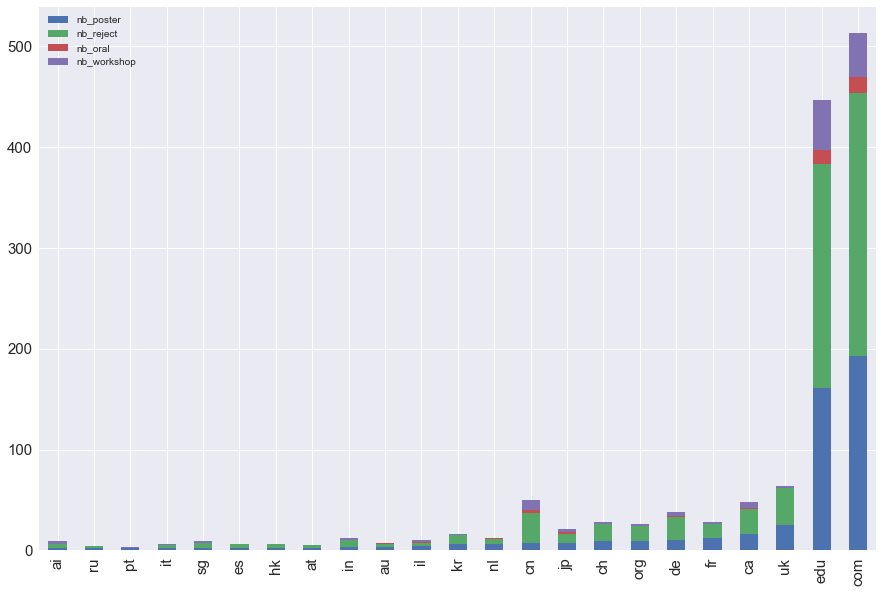

In [180]:
df_country[df_country.nb_poster > 1][['nb_poster','nb_reject','nb_oral','nb_workshop']].sort_values(by='nb_poster').plot.bar(figsize=(15,10),legend=True,fontsize=15,stacked=True)

##  Bar plot of the number of accepted paper by country

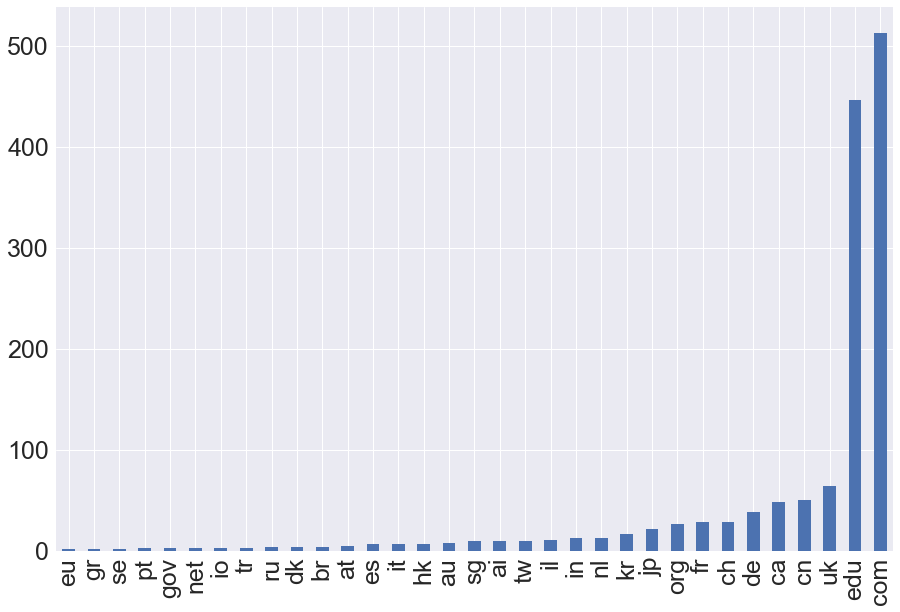

In [179]:
df_country[df_country.nb_paper >1].nb_paper.sort_values().plot.bar(figsize=(15,10),legend=False,fontsize=25)